# Routine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
pd.set_option("display.float_format", "{:,.1f}".format)

In [2]:
dft = pd.read_csv("./db/GlobalLandTemperaturesByCountry.csv")
dft

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
dft.shape

(577462, 4)

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
dft["Country"].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
dft["year"] = pd.to_datetime(dft["dt"])
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


In [7]:
idx = dft["year"] > pd.to_datetime('1970-01-01')
dft = dft[idx]
dft

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [8]:
dft_avg = dft.groupby(["Country", 
            pd.Grouper(key="year", freq="1Y")]).agg({"AverageTemperature": [np.mean, np.median]})

In [9]:
dft_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

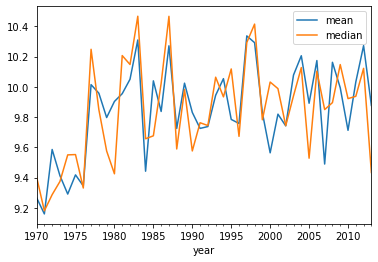

In [10]:
dft_avg.xs("Chile")["AverageTemperature"].plot()

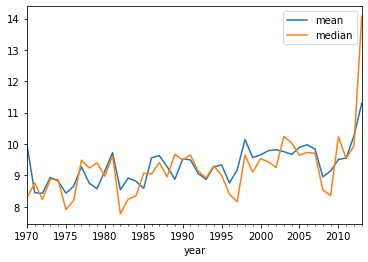

In [11]:
dft_avg.xs("United States")["AverageTemperature"].plot()
# LA mediana no sufre ante outliners otipicos

In [12]:
dft_med = dft_avg["AverageTemperature"][["median"]].reset_index()
dft_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [13]:
dft_med["date"] = dft_med["year"].dt.year
dft_med["date"]

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [14]:
dft_med.rename(columns={"median":"temperature"}, inplace=True)
dft_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [15]:
dftpivot = dft_med.pivot_table(values="temperature", index="date",columns="Country")
dftpivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


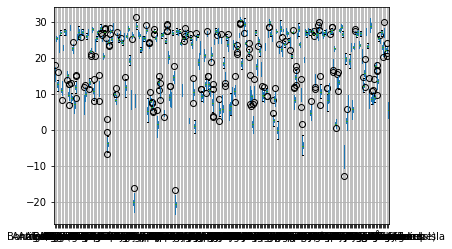

In [16]:
dftpivot.boxplot()

In [17]:
dftpivot.sample

<bound method NDFrame.sample of Country  Afghanistan   Africa  Albania  Algeria  American Samoa  Andorra  \
date                                                                       
1970         16.1990  25.2360  12.4230  23.2840         26.7180  11.6390   
1971         14.9340  24.7755  11.6735  22.7810         26.4845  11.9275   
1972         13.8725  25.1230  11.2175  22.4985         26.8205  10.0250   
1973         14.9130  25.3445  11.8370  22.9975         27.0120   9.5525   
1974         13.6160  24.8260  11.3210  21.5795         26.6350   8.2045   
1975         13.5130  24.8045  12.3595  23.0740         26.6510  10.4105   
1976         14.1615  24.8225  12.6080  22.2980         26.6155   9.6625   
1977         15.6575  25.0345  11.9870  23.5375         26.7085  10.4055   
1978         15.2580  24.9135  11.5490  22.5620         26.7250   9.7565   
1979         16.2990  25.3705  11.7765  23.1455         26.8385  10.4145   
1980         16.3110  25.2955  11.9060  23.1765         

In [18]:
!ls ./db

API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv
covid
GlobalLandTemperaturesByCountry.csv
london_merged.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
meteorite_landings.csv
poblacion.csv
test.csv
test.hdf
test.json
test.pkl
test.xlsx


In [19]:
df_agri = pd.read_csv("./db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv", header = 2)
df_fore = pd.read_csv("./db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv", header = 2)
df_elec = pd.read_csv("./db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv", header = 2)
df_co2e = pd.read_csv("./db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv", header = 2)
df_popu = pd.read_csv("./db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv", header = 2)

In [20]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


In [21]:
range(1971,2015)
map(str, range(1971,2015))
cols = ["Country Name", "Country Code"] + list(map(str, range(1971,2015)))

In [22]:
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [23]:
df_agri.loc[:,cols].melt(id_vars=["Country Name", "Country Code"] ).rename(
    columns={"variable": "date",
            "Country Name": "country",
            "Country Code": "name",
            "value":"agriculture"})

,country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [24]:
def df_format(df, col="agriculture"):
    return df.loc[:,cols].melt(id_vars=["Country Name", "Country Code"] ).rename(
    columns={"variable": "date",
            "Country Name": "Country",
            "Country Code": "name",
            "value":col})

In [25]:
df_agri = df_format(df_agri, col="agriculture")
df_fore = df_format(df_fore, col="forest")
df_elec = df_format(df_elec, col="electricprod")
df_co2e = df_format(df_co2e, col="co2")
df_popu = df_format(df_popu, col="population")
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [26]:
dft_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [27]:
df_agri["date"] = df_agri["date"].astype(float)
df_fore["date"] = df_fore["date"].astype(float)
df_elec["date"] = df_elec["date"].astype(float)
df_co2e["date"] = df_co2e["date"].astype(float)
df_popu["date"] = df_popu["date"].astype(float)

In [28]:
dfmerge = pd.merge(dft_med[["Country","temperature","date"]],
                  df_popu, on = ["Country", "date"], how="inner")

In [32]:
dfmerge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [35]:
dfmerge = pd.merge(dfmerge,
                  df_agri, on = ["Country","name", "date"], how="inner")
dfmerge = pd.merge(dfmerge,
                  df_fore, on = ["Country","name", "date"], how="inner")
dfmerge = pd.merge(dfmerge,
                  df_elec, on = ["Country","name", "date"],how="inner")
dfmerge = pd.merge(dfmerge,
                  df_co2e, on = ["Country","name", "date"],how="inner")
dfmerge

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
0,Afghanistan,14.9340,1971,AFG,11475445.0,380360.0,NaN,NaN,1895.839
1,Afghanistan,13.8725,1972,AFG,11791215.0,380460.0,NaN,NaN,1532.806
2,Afghanistan,14.9130,1973,AFG,12108963.0,380480.0,NaN,NaN,1639.149
3,Afghanistan,13.6160,1974,AFG,12412950.0,380480.0,NaN,NaN,1917.841
4,Afghanistan,13.5130,1975,AFG,12689160.0,380480.0,NaN,NaN,2126.860
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,159510.000000,585.456912,5603.176
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,156240.000000,606.644199,7777.707
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,153115.996094,636.249337,9563.536
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,149992.001953,608.762505,7792.375


In [38]:
df_clime = dfmerge.dropna()
df_clime

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
62,Albania,13.4490,1990,ALB,3286542.0,11210.0,7887.999878,552.252185,5515.168
63,Albania,11.5885,1991,ALB,3266790.0,11270.0,7868.499756,418.453589,4286.723
64,Albania,13.5850,1992,ALB,3247039.0,11270.0,7849.000244,453.644074,2515.562
65,Albania,13.6500,1993,ALB,3227287.0,11260.0,7829.500122,536.363825,2335.879
66,Albania,13.2390,1994,ALB,3207536.0,11260.0,7810.000000,596.407959,1925.175
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,159510.000000,585.456912,5603.176
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,156240.000000,606.644199,7777.707
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,153115.996094,636.249337,9563.536
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,149992.001953,608.762505,7792.375


In [41]:
df_clime.groupby("Country")["co2"].mean().sort_values(ascending=False)

Country
North America   5,876,902.9
United States   5,367,344.8
China           5,202,289.9
Japan           1,190,596.2
India           1,176,885.0
                    ...    
Mozambique          1,796.4
Haiti               1,605.4
Togo                1,464.7
Niger                 988.8
Eritrea               676.2
Name: co2, Length: 120, dtype: float64

In [46]:
first_10 = df_clime.groupby("Country")["co2"].mean().sort_values(ascending=False).head(10)
first_10.index

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [48]:
df_max_co2 = df_clime[df_clime["Country"].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
1266,Canada,-4.6,1990,CAN,"27,691,138.0","677,680.0","3,482,730.0","16,167.4","435,181.2"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","677,530.0","3,482,259.1","16,181.6","426,780.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","678,140.0","3,481,788.1","16,164.4","440,978.8"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","678,740.0","3,481,316.9","16,320.1","445,580.8"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","679,340.0","3,480,845.9","16,388.3","456,849.5"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","4,099,606.9","3,079,274.1","12,913.7","5,263,505.5"
7005,United States,10.2,2010,USA,"309,326,085.0","4,084,261.9","3,087,200.0","13,394.9","5,395,532.1"
7006,United States,9.5,2011,USA,"311,580,009.0","4,046,693.1","3,089,950.0","13,246.0","5,289,680.5"
7007,United States,9.9,2012,USA,"313,874,218.0","4,087,065.0","3,092,700.0","12,964.3","5,119,436.4"


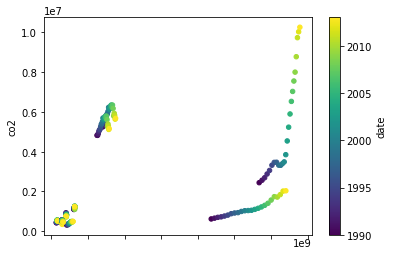

In [49]:
df_max_co2.set_index("Country").plot.scatter(
x="population", y="co2",c="date",colormap="viridis")

In [50]:
df_clime.corr()

,temperature,date,population,agriculture,forest,electricprod,co2
temperature,1.0,0.0,-0.0,-0.1,-0.1,-0.4,-0.2
date,0.0,1.0,0.0,-0.0,-0.0,0.1,0.0
population,-0.0,0.0,1.0,0.6,0.4,-0.0,0.6
agriculture,-0.1,-0.0,0.6,1.0,0.7,0.1,0.8
forest,-0.1,-0.0,0.4,0.7,1.0,0.2,0.7
electricprod,-0.4,0.1,-0.0,0.1,0.2,1.0,0.2
co2,-0.2,0.0,0.6,0.8,0.7,0.2,1.0


In [51]:
import seaborn as sns

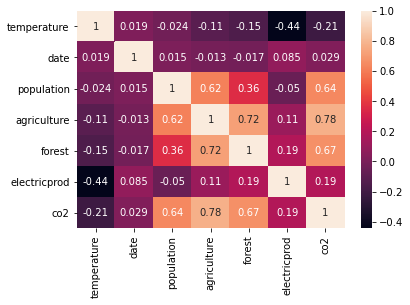

In [54]:
sns.heatmap(df_clime.corr(), annot=True)

In [56]:
df_med = df_clime.groupby("date").median()
df_med

,temperature,population,agriculture,forest,electricprod,co2
date,,,,,,
1990,22.7,"10,213,863.0","90,195.0","54,005.0","1,114.7","31,363.9"
1991,22.4,"10,346,663.5","91,870.0","60,307.5","1,072.5","27,343.0"
1992,19.9,"9,188,305.5","89,700.0","45,621.0","1,451.8","26,420.7"
1993,20.6,"9,951,683.5","89,890.0","44,579.0","1,520.3","28,267.1"
1994,20.7,"9,991,525.0","89,150.0","42,572.0","1,576.8","29,640.4"
1995,20.1,"10,026,176.0","81,080.0","41,640.0","1,578.3","29,090.3"
1996,20.2,"10,063,945.0","79,870.0","41,270.0","1,687.1","30,670.8"
1997,20.4,"10,108,977.0","80,120.0","41,270.0","1,762.4","30,623.1"
1998,21.5,"10,069,000.0","80,550.0","40,834.0","1,807.3","31,675.5"


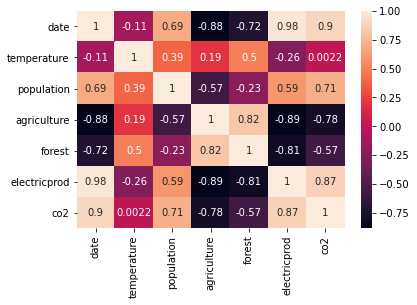

In [58]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

In [59]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbab6205400>,
      dtype=object)

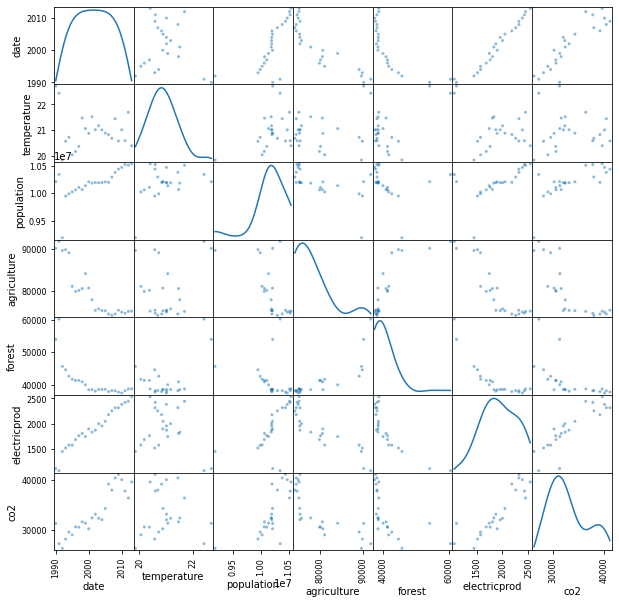

In [61]:
scatter_matrix(df_med.reset_index(), diagonal="kde", figsize=(10,10))

In [63]:
from pandas.plotting import parallel_coordinates

In [64]:
df_samerica = df_clime[
    df_clime["Country"].isin(["Colombia","Argentina","Bolivia","Mexico","Peru","Chile"])][[
    "Country","temperature","co2","agriculture","forest"
]]
df_samerica

,Country,temperature,co2,agriculture,forest
277,Argentina,15.4,"112,147.9","1,275,650.0","347,930.0"
278,Argentina,14.9,"117,098.3","1,276,600.0","344,997.0"
279,Argentina,14.9,"121,352.0","1,277,550.0","342,064.0"
280,Argentina,15.5,"117,927.1","1,278,500.0","339,131.0"
281,Argentina,15.0,"122,408.1","1,279,480.0","336,198.0"
...,...,...,...,...,...
5370,Peru,20.6,"51,704.7","239,460.0","749,544.0"
5371,Peru,20.5,"57,593.9","240,230.0","748,110.0"
5372,Peru,20.3,"49,632.8","241,040.0","746,434.0"
5373,Peru,20.6,"55,071.0","243,321.0","744,758.0"


In [ ]:
parallel_coordinates(df_samerica)